In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


def multipage(filename, figs=None, dpi=200):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()


month = {'Jan': 0, 'Feb': 1, 'Mar': 2, 'Apr': 3, 'May': 4, 'June': 5,
         'Jul': 6, 'Aug': 7, 'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11}
visitor = {'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2}
weekend = {'FALSE': 0, 'TRUE': 1}
revenue = {'FALSE': [1, 0], 'TRUE': [0, 1]}

In [3]:
with open("online_shoppers_intention.csv", newline='') as read:
    reader = csv.reader(read)
    data = list(reader)

names = data.pop(0)

visit_type = [[[], [], []], [[], [], []]]
visit_length = [[[], [], []], [[], [], []]]
bouncerate = [[], []]
exitrate = [[], []]
pagevalues = [[], []]
specialday = [[], []]
month_data = np.zeros((2, 12), dtype=int)
month_types = []
os = np.zeros((2, 8), dtype=int)
browser = np.zeros((2, 13), dtype=int)
region = np.zeros((2, 9), dtype=int)
traffictype = np.zeros((2, 20), dtype=int)
visitortype = np.zeros((2, 3), dtype=int)
weekend_data = np.zeros((2, 2), dtype=int)
for v in data:
    n = 0
    if v[len(v)-1] == 'TRUE':
        n = 1
# Administrative,Administrative_Duration, Informational,Informational_Duration, ProductRelated,ProductRelated_Duration
    for k in range(3):
        visit_type[n][k].append(int(v[k*2]))
        visit_length[n][k].append(float(v[k*2+1]))
# BounceRates, ExitRates
    bouncerate[n].append(float(v[6]))
    exitrate[n].append(float(v[7]))
# PageValues
    pagevalues[n].append(float(v[8]))
# SpecialDay
    specialday[n].append(float(v[9]))
# Month
    month_data[n][month[v[10]]] += 1
    month_types.append(v[10])
# OperatingSystem
    os[n][int(v[11])-1] += 1
# Browser
    browser[n][int(v[12])-1] += 1
# Region
    region[n][int(v[13])-1] += 1
# TrafficType
    traffictype[n][int(v[14])-1] += 1
# VisitorType
    visitortype[n][visitor[v[15]]] += 1
# Weekend
    weekend_data[n][weekend[v[16]]] += 1

Administrative info:
	Pages:
0 27 2.1177317213586644 0.0
0 26 3.393605870020964 2.0
	Length:
0.0 3398.75 73.74011116864949 0.0
0.0 2086.75 119.48324389431184 52.366666665


Informational info:
	Pages:
0 24 0.45183266167722125 0.0
0 12 0.7861635220125787 0.0
	Length:
0.0 2549.375 30.236237228827285 0.0
0.0 1767.666667 57.61142665093658 0.0


ProductRelated info:
	Pages:
0 705 28.71464210324314 16.0
0 534 48.2101677148847 29.0
	Length:
0.0 63973.52223 1069.9878091544429 510.19
0.0 27009.85943 1876.2096148889045 1109.90625







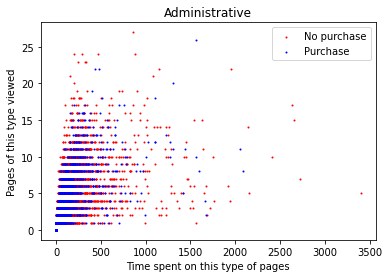

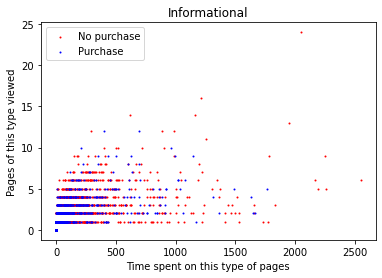

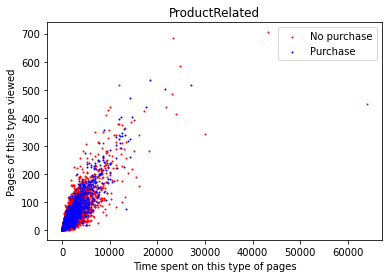

In [4]:
# Administrative,Administrative_Duration, Informational,Informational_Duration, ProductRelated,ProductRelated_Duration
for k in range(3):
    print(names[k*2]+' info:')
    print("\tPages:")
    print(np.amin(visit_type[0][k]), np.amax(visit_type[0][k]), np.mean(visit_type[0][k]), np.median(visit_type[0][k]))
    print(np.amin(visit_type[1][k]), np.amax(visit_type[1][k]), np.mean(visit_type[1][k]), np.median(visit_type[1][k]))
    print("\tLength:")
    print(np.amin(visit_length[0][k]), np.amax(visit_length[0][k]),
          np.mean(visit_length[0][k]), np.median(visit_length[0][k]))
    print(np.amin(visit_length[1][k]), np.amax(visit_length[1][k]),
          np.mean(visit_length[1][k]), np.median(visit_length[1][k]))
    print('\n')
    fig = plt.figure(k)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Time spent on this type of pages')
    ax.set_ylabel('Pages of this type viewed')
    ax.set_title(names[k*2])
    plt.scatter(visit_length[0][k], visit_type[0][k], color='r', s=1)
    plt.scatter(visit_length[1][k], visit_type[1][k], color='b', s=1)  # overshadows red dots
    plt.legend(labels=['No purchase', 'Purchase'])
# clients have higher average values despite having lower max values
print('\n\n')

BounceRate info:
0.0 0.2 0.025317232197850703 0.004255319
0.0 0.2 0.005117152640461215 0.0
ExitRate info:
0.0 0.2 0.04737827052648245 0.028571429
0.0 0.2 0.019555168256813416 0.016





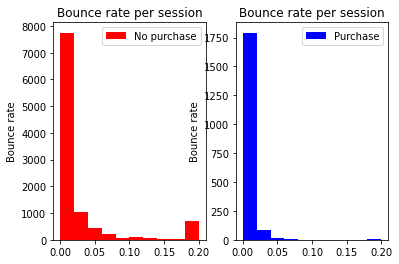

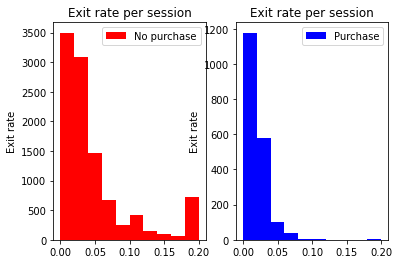

In [5]:
# BounceRates, ExitRates
print("BounceRate info:")
fig = plt.figure(4)
ax = fig.add_subplot(1, 2, 1)
ax.hist(bouncerate[0], color='r')
ax.set_ylabel('Users')
ax.set_ylabel('Bounce rate')
ax.set_title('Bounce rate per session')
ax.legend(labels=['No purchase'])
ax = fig.add_subplot(1, 2, 2)
ax.hist(bouncerate[1], color='b')
ax.set_ylabel('Users')
ax.set_title('Bounce rate per session')
ax.set_ylabel('Bounce rate')
ax.legend(labels=['Purchase'])
print(np.amin(bouncerate[0]), np.amax(bouncerate[0]), np.mean(bouncerate[0]), np.median(bouncerate[0]))
print(np.amin(bouncerate[1]), np.amax(bouncerate[1]), np.mean(bouncerate[1]), np.median(bouncerate[1]))
print("ExitRate info:")
fig = plt.figure(5)
ax = fig.add_subplot(1, 2, 1)
ax.hist(exitrate[0], color='r')
ax.set_ylabel('Users')
ax.set_ylabel('Exit rate')
ax.set_title('Exit rate per session')
ax.legend(labels=['No purchase'])
ax = fig.add_subplot(1, 2, 2)
ax.hist(exitrate[1], color='b')
ax.set_ylabel('Users')
ax.set_title('Exit rate per session')
ax.set_ylabel('Exit rate')
ax.legend(labels=['Purchase'])
print(np.amin(exitrate[0]), np.amax(exitrate[0]), np.mean(exitrate[0]), np.median(exitrate[0]))
print(np.amin(exitrate[1]), np.amax(exitrate[1]), np.mean(exitrate[1]), np.median(exitrate[1]))
# values between 0-0.2, clients have average lower rate than visitors
print('\n\n')

PageValues info:
0.0 246.7585902 1.9759977673701787 0.0
0.0 361.7637419 27.264518194696016 16.758133555





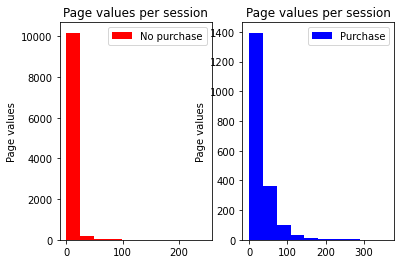

In [6]:
# PageValues
print('PageValues info:')
fig = plt.figure(6)
ax = fig.add_subplot(1, 2, 1)
ax.hist(pagevalues[0], color='r')
ax.set_ylabel('Users')
ax.set_ylabel('Page values')
ax.set_title('Page values per session')
ax.legend(labels=['No purchase'])
ax = fig.add_subplot(1, 2, 2)
ax.hist(pagevalues[1], color='b')
ax.set_ylabel('Users')
ax.set_ylabel('Page values')
ax.set_title('Page values per session')
ax.legend(labels=['Purchase'])
print(np.amin(pagevalues[0]), np.amax(pagevalues[0]), np.mean(pagevalues[0]), np.median(pagevalues[0]))
print(np.amin(pagevalues[1]), np.amax(pagevalues[1]), np.mean(pagevalues[1]), np.median(pagevalues[1]))
# similar distribution
print('\n\n')

SpecialDay info:
0.0 1.0 0.06843216273268087 0.0
0.0 1.0 0.023165618448637317 0.0





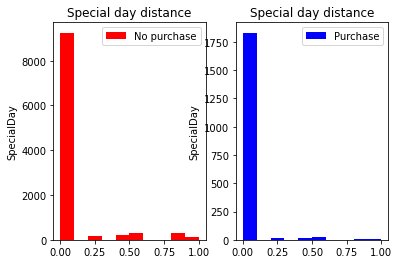

In [7]:
# SpecialDay
print('SpecialDay info:')
fig = plt.figure(7)
ax = fig.add_subplot(1, 2, 1)
ax.hist(specialday[0], color='r')
ax.set_ylabel('Users')
ax.set_ylabel('SpecialDay')
ax.set_title('Special day distance')
ax.legend(labels=['No purchase'])
ax = fig.add_subplot(1, 2, 2)
ax.hist(specialday[1], color='b')
ax.set_ylabel('Users')
ax.set_ylabel('SpecialDay')
ax.set_title('Special day distance')
ax.legend(labels=['Purchase'])
print(np.amin(specialday[0]), np.amax(specialday[0]), np.mean(specialday[0]), np.median(specialday[0]))
print(np.amin(specialday[1]), np.amax(specialday[1]), np.mean(specialday[1]), np.median(specialday[1]))
# similar traffic from both clients and visitors, highest at 0 - long before or very near the special day
print('\n\n')

Month types found:
['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']
Month data:
[[   0  181 1715    0 2999  259  366  357  362  434 2238 1511]
 [   0    3  192    0  365   29   66   76   86  115  760  216]]





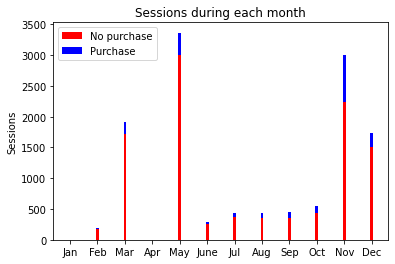

In [8]:
# Month
month_types = list(dict.fromkeys(month_types))
# no data: January and April
# high traffic: March, May, Dec, Nov
# low traffic: Feb, July, June, August, September
print("Month types found:")
print(month_types)
print("Month data:")
print(month_data)
ind = np.arange(12)
fig = plt.figure(8)
ax = fig.add_subplot(111)
ax.bar(ind, month_data[0], 0.1, color='r')
ax.bar(ind, month_data[1], 0.1, bottom=month_data[0], color='b')
ax.set_ylabel('Sessions')
ax.set_title('Sessions during each month')
ax.legend(labels=['No purchase', 'Purchase'])
plt.xticks(np.arange(12), month.keys())
print('\n\n')

OperatingSystems info:
[[2206 5446 2287  393    5   17    6   62]
 [ 379 1155  268   85    1    2    1   17]]





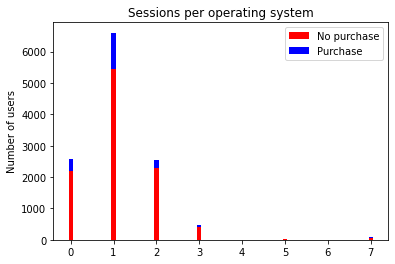

In [9]:
#OperatingSystems
print('OperatingSystems info:')
print(os)
ind = np.arange(8)
fig = plt.figure(9)
ax = fig.add_subplot(111)
ax.bar(ind, os[0], 0.1, color='r')
ax.bar(ind, os[1], 0.1, bottom=os[0], color='b')
ax.set_ylabel('Number of users')
ax.set_title('Sessions per operating system')
ax.legend(labels=['No purchase', 'Purchase'])
print('\n\n')

Browser info:
[[2097 6738  100  606  381  154   43  114    1  131    5    7   45]
 [ 365 1223    5  130   86   20    6   21    0   32    1    3   16]]





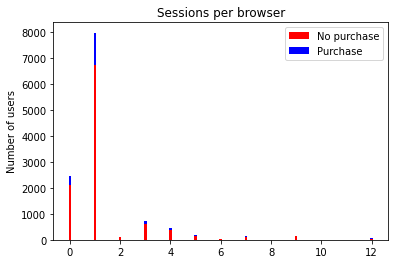

In [10]:
#Browser
print('Browser info:')
print(browser)
ind = np.arange(13)
fig = plt.figure(10)
ax = fig.add_subplot(111)
ax.bar(ind, browser[0], 0.1, color='r')
ax.bar(ind, browser[1], 0.1, bottom=browser[0], color='b')
ax.set_ylabel('Number of users')
ax.set_title('Sessions per browser')
ax.legend(labels=['No purchase', 'Purchase'])
print('\n\n')

Region info:
[[4009  948 2054 1007  266  693  642  378  425]
 [ 771  188  349  175   52  112  119   56   86]]
Browser info:
[[2097 6738  100  606  381  154   43  114    1  131    5    7   45]
 [ 365 1223    5  130   86   20    6   21    0   32    1    3   16]]





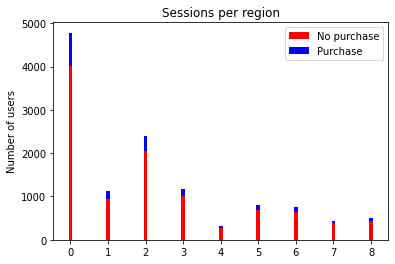

In [11]:
#Region
print('Region info:')
print(region)
print('Browser info:')
print(browser)
ind = np.arange(9)
fig = plt.figure(11)
ax = fig.add_subplot(111)
ax.bar(ind, region[0], 0.1, color='r')
ax.bar(ind, region[1], 0.1, bottom=region[0], color='b')
ax.set_ylabel('Number of users')
ax.set_title('Sessions per region')
ax.legend(labels=['No purchase', 'Purchase'])
print('\n\n')

TrafficType info:
[[2189 3066 1872  904  204  391   28  248   38  360  200    1  695   11
    38    2    1   10   16  148]
 [ 262  847  180  165   56   53   12   95    4   90   47    0   43    2
     0    1    0    0    1   50]]





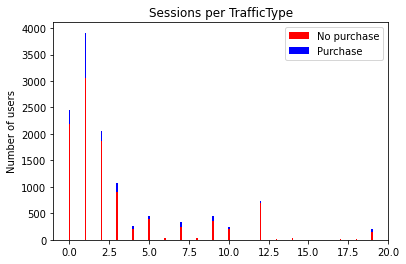

In [12]:
#TrafficType
print('TrafficType info:')
print(traffictype)
ind = np.arange(20)
fig = plt.figure(12)
ax = fig.add_subplot(111)
ax.bar(ind, traffictype[0], 0.1, color='r')
ax.bar(ind, traffictype[1], 0.1, bottom=traffictype[0], color='b')
ax.set_ylabel('Number of users')
ax.set_title('Sessions per TrafficType')
ax.legend(labels=['No purchase', 'Purchase'])
print('\n\n')

VisitorType info:
[[1272 9081   69]
 [ 422 1470   16]]





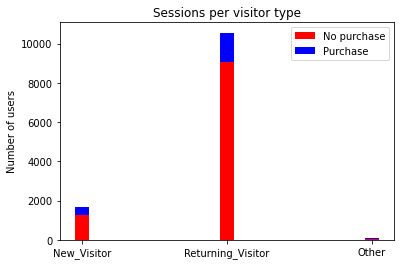

In [13]:
#VisitorType
print('VisitorType info:')
print(visitortype)
ind = np.arange(3)
fig = plt.figure(13)
ax = fig.add_subplot(111)
ax.bar(ind, visitortype[0], 0.1, color='r')
ax.bar(ind, visitortype[1], 0.1, bottom=visitortype[0], color='b')
ax.set_ylabel('Number of users')
ax.set_title('Sessions per visitor type')
ax.legend(labels=['No purchase', 'Purchase'])
plt.xticks(np.arange(3), visitor.keys())
# returning clients purchase more per visitor and are largest group
print('\n\n')

Weekend info:
[[8053 2369]
 [1409  499]]





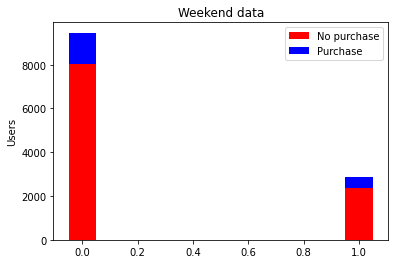

In [28]:

#Weekend
print('Weekend info:')
fig = plt.figure(14)
ind = np.arange(2)
ax = fig.add_subplot(111)
ax.bar(ind, weekend_data[0], 0.1, color='r')
ax.bar(ind, weekend_data[1], 0.1, bottom=weekend_data[0], color='b')
ax.set_ylabel('Users')
ax.set_title('Weekend data')
ax.legend(labels=['No purchase', 'Purchase'])
print(weekend_data)
print('\n\n')

In [15]:
multipage('multipage.pdf')
plt.show()